<a href="https://colab.research.google.com/github/aliroshandel98/Pytorch/blob/main/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OK
Here we are in pytorch computer vision exercises notebook
i think it will be a lot of coding but its fun for me and im practicing and learning so its good!

like always thanks you for being with me in my progress during ML DL and data science using pytorch.

#1.What are 3 areas in industry where computer vision is currently being used?

first i should point my own target field wich is autonomous vehicle control,computer vision is used vastely in this field like in object detecting.

then its used in food recognition apps wich you can take a picture of a food and it says what food it is and whats the recipie.

one another use in industry is product packaging, robots can use CV to package things more efficently.

#2.Search "what is overfitting in machine learning" and write down a sentence about what you find.


overfitting accures when the model fit the data very well but in case you want to predict new predictions it will not be accurate
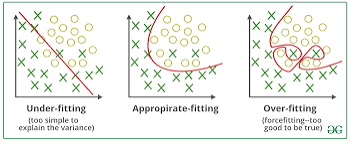


#3.Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.

1.Early stopping: in this method before model train through noise in data we stop the training.

2.train with more data: in this method we use more data to train model and if there is no more we can sometimes create data from existing data we have.

3.regularization: in this method we can regularize model to make a simpler model then sometimes with that simpler model overfit does'nt accure.

#4.Spend 20-minutes reading and clicking through the CNN Explainer website.

I did it (:

#5.Load the torchvision.datasets.MNIST() train and test datasets.

In [1]:
import torch
import torchvision
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
train_data = MNIST(root='data',
                   train=True,
                   download=True,
                   transform=ToTensor(),
                   )
test_data = MNIST(root='data',
                   download=True,
                   train=False,
                   transform=ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 116244645.69it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 31276967.16it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26707542.40it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5971952.59it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

#6.Visualize at least 5 different samples of the MNIST training dataset.

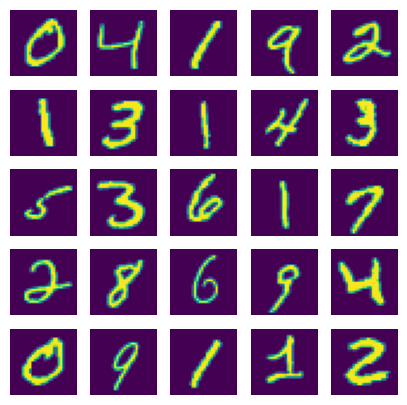

In [5]:
rows = 5
cols = 5
plt.figure(figsize=(5,5))
for i in range(1, rows*cols+1):
  img, label = train_data[i]
  plt.subplot(rows, cols, i)
  plt.imshow(img.reshape(28, 28, 1))
  plt.axis(False)


#7.Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [6]:
train_dataloader = DataLoader(train_data, 32, shuffle=True)
test_dataloader = DataLoader(test_data, 32, shuffle=True)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bbca419d6c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7bbd7d425720>)

#8.Recreate model_2 used in this notebook (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [7]:
train_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [8]:
class Model(nn.Module):
  def __init__(self, input, output, hidden):
    super().__init__()
    self.Block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input, out_channels=hidden, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden, out_channels=hidden, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.Block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden, out_channels=hidden, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden, out_channels=hidden, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden*7*7, out_features=output)
    )
  def forward(self, x: torch.Tensor):
    return self.classifier(self.Block_2(self.Block_1(x)))


In [9]:
model = Model(1,10,10)
model.to(device)

Model(
  (Block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

#9.Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.

ok i dont want cpu, gpu is damn good

In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                             lr=0.1)
epochs = 10
for epoch in range(epochs):
  train_loss = 0
  for batch,(x,y) in enumerate(train_dataloader):
    x, y = x.to(device), y.to(device)
    model.train()
    y_preds = model(x)
    loss = loss_fn(y_preds, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(train_dataloader)
  test_loss = 0
  with torch.inference_mode():
    for batch, (x_test,y_test) in enumerate(test_dataloader):
      x_test, y_test  = x_test.to(device), y_test.to(device)
      model.eval()
      test_preds = model(x_test)
      test_loss += loss_fn(test_preds, y_test)
    test_loss /= len(test_dataloader)
    print(f"epoch: {epoch+1}| loss:{train_loss} | test loss:{test_loss}")

epoch: 1| loss:0.23885604739189148 | test loss:0.07422548532485962
epoch: 2| loss:0.07146136462688446 | test loss:0.05140416696667671
epoch: 3| loss:0.056519851088523865 | test loss:0.043081678450107574
epoch: 4| loss:0.0476338192820549 | test loss:0.04048091173171997
epoch: 5| loss:0.04058841988444328 | test loss:0.04125744476914406
epoch: 6| loss:0.03797457367181778 | test loss:0.037259913980960846
epoch: 7| loss:0.03412851691246033 | test loss:0.04598454013466835
epoch: 8| loss:0.03138343617320061 | test loss:0.03501008078455925
epoch: 9| loss:0.029247645288705826 | test loss:0.03191126883029938
epoch: 10| loss:0.027528174221515656 | test loss:0.03533436357975006


#10.Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

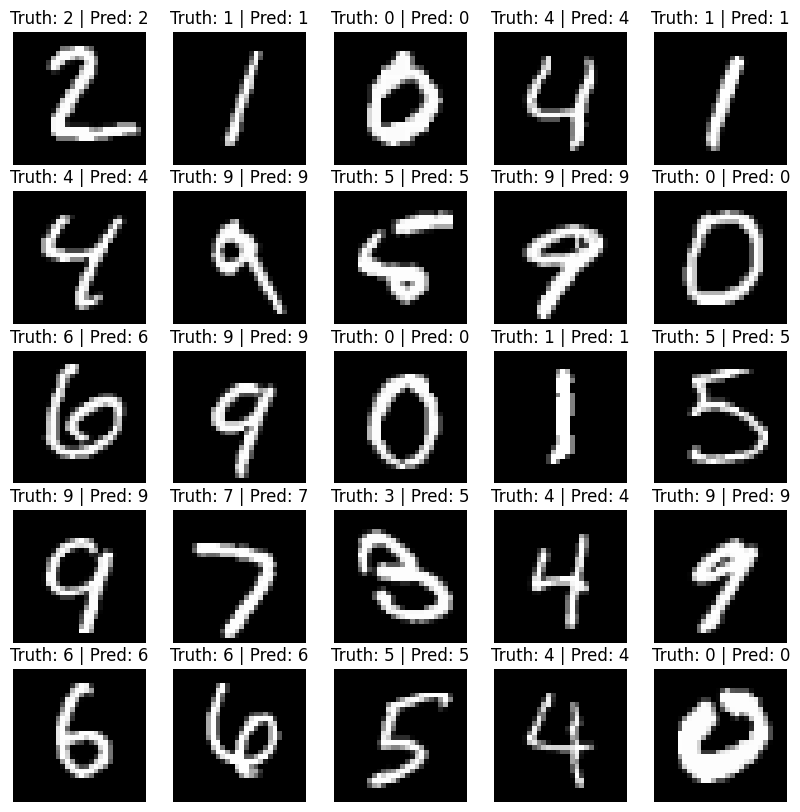

In [11]:
plt.figure(figsize=(10,10))
cols = 5
rows = 5
for i in range(1, cols*rows+1):
  # Get image and labels from the test data
  img = test_data[i][0]
  label = test_data[i][1]

  # Make prediction on image
  model_pred_logits = model(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plot the image and prediction
  plt.subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
  plt.axis(False);

#11.Plot a confusion matrix comparing your model's predictions to the truth labels.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.6 MB/s eta 0:00:00
mlxtend version: 0.23.1
0.23.1


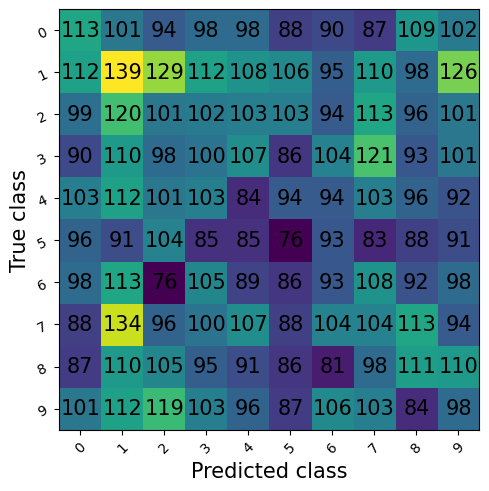

In [12]:
class_names = train_data.classes
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
y_preds = []
model.eval()
with torch.inference_mode():
  for batch, (x,y) in enumerate(test_dataloader):
    x ,y = x.to(device), y.to(device)
    y_logits = model(x)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)

confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat(preds=y_pred_tensor, target=test_data.targets)
fig_, ax_ = confmat.plot()

#12.Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?

In [23]:
x = torch.rand(1, 3, 64, 64)
y1 = torch.nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, padding=1, stride=1)
z1 = y1(x)
print(z1.shape)
y2 = torch.nn.Conv2d(in_channels=3, out_channels=3, kernel_size=6, padding=1, stride=1)
z2 = y2(x)
print(z2.shape)
y3 = torch.nn.Conv2d(in_channels=3, out_channels=3, kernel_size=10, padding=1, stride=1)
z3 = y3(x)
print(z3.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 3, 61, 61])
torch.Size([1, 3, 57, 57])


if kernel size goes up the output shape of image will be decreasing in pixels

#13.Use a model similar to the trained model_2 from this notebook to make predictions on the test torchvision.datasets.FashionMNIST dataset.

Then plot some predictions where the model was wrong alongside what the label of the image should've been.

After visualing these predictions do you think it's more of a modelling error or a data error?

As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [27]:
train_data_fashion = torchvision.datasets.FashionMNIST(root='data',
                                                       train=True,
                                                       transform=ToTensor(),
                                                       download=True)
test_data_fashion = torchvision.datasets.FashionMNIST(root='data',
                                                      train=False,
                                                      transform=ToTensor(),
                                                      download=True)
train_dataloader_fashion = DataLoader(train_data_fashion, 32, shuffle=True)
test_dataloader_fashion = DataLoader(test_data_fashion, 32, shuffle=True)

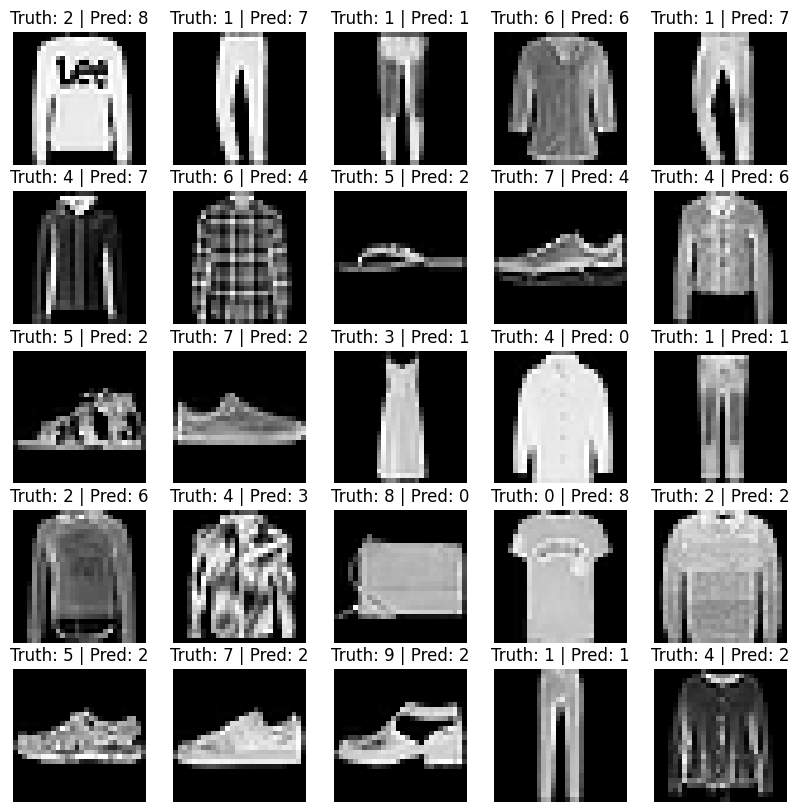

In [28]:
plt.figure(figsize=(10,10))
cols = 5
rows = 5
for i in range(1, cols*rows+1):
  # Get image and labels from the test data
  img = test_data_fashion[i][0]
  label = test_data_fashion[i][1]

  # Make prediction on image
  model_pred_logits = model(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plot the image and prediction
  plt.subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
  plt.axis(False);